# Python - Time Series Data with Pandas

In [106]:
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pytz

%matplotlib inline

## Generate Time Series Data

In [47]:
# Generate data with time
ts = pd.Series(np.random.rand(100), index=pd.date_range(datetime.now(), periods=100))
ts

2020-11-30 08:53:58.271878    0.566087
2020-12-01 08:53:58.271878    0.906584
2020-12-02 08:53:58.271878    0.512919
2020-12-03 08:53:58.271878    0.878789
2020-12-04 08:53:58.271878    0.942902
                                ...   
2021-03-05 08:53:58.271878    0.983846
2021-03-06 08:53:58.271878    0.289516
2021-03-07 08:53:58.271878    0.840058
2021-03-08 08:53:58.271878    0.519680
2021-03-09 08:53:58.271878    0.506116
Freq: D, Length: 100, dtype: float64

In [48]:
# Genereate data without time (normalize = True)
ts = pd.Series(np.random.rand(100), index=pd.date_range(datetime.now(), periods=100, normalize=True))
ts

2020-11-30    0.403108
2020-12-01    0.386055
2020-12-02    0.904074
2020-12-03    0.705386
2020-12-04    0.527159
                ...   
2021-03-05    0.271150
2021-03-06    0.851113
2021-03-07    0.778842
2021-03-08    0.380553
2021-03-09    0.552797
Freq: D, Length: 100, dtype: float64

In [50]:
# You can generaete data using different frequency offset alias
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

# BM - business month end
pd.date_range(start=dt, end=dt+timedelta(days=365), freq='BM')

DatetimeIndex(['2020-11-30', '2020-12-31', '2021-01-29', '2021-02-26',
               '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
               '2021-07-30', '2021-08-31', '2021-09-30', '2021-10-29'],
              dtype='datetime64[ns]', freq='BM')

In [51]:
# Every 90 minutes
pd.date_range(start=dt, end=dt+timedelta(days=3), freq='1H30T')

DatetimeIndex(['2020-11-29 00:00:00', '2020-11-29 01:30:00',
               '2020-11-29 03:00:00', '2020-11-29 04:30:00',
               '2020-11-29 06:00:00', '2020-11-29 07:30:00',
               '2020-11-29 09:00:00', '2020-11-29 10:30:00',
               '2020-11-29 12:00:00', '2020-11-29 13:30:00',
               '2020-11-29 15:00:00', '2020-11-29 16:30:00',
               '2020-11-29 18:00:00', '2020-11-29 19:30:00',
               '2020-11-29 21:00:00', '2020-11-29 22:30:00',
               '2020-11-30 00:00:00', '2020-11-30 01:30:00',
               '2020-11-30 03:00:00', '2020-11-30 04:30:00',
               '2020-11-30 06:00:00', '2020-11-30 07:30:00',
               '2020-11-30 09:00:00', '2020-11-30 10:30:00',
               '2020-11-30 12:00:00', '2020-11-30 13:30:00',
               '2020-11-30 15:00:00', '2020-11-30 16:30:00',
               '2020-11-30 18:00:00', '2020-11-30 19:30:00',
               '2020-11-30 21:00:00', '2020-11-30 22:30:00',
               '2020-12-

## Handling Time Zone

In [55]:
# View common time zones
# pytz.common_timezones

In [57]:
# Check time series time zone zone
print(ts.index.tz)

None


In [60]:
ts_utc = ts.tz_localize('UTC')
print(ts_utc.index.tz)

UTC


In [62]:
ts_sgt = ts.tz_localize('Asia/Singapore')
print(ts_sgt.index.tz)

Asia/Singapore


In [63]:
ts_london = ts.tz_localize('Europe/London')
print(ts_london.index.tz)

Europe/London


In [73]:
# Convert between timezone
utc_time = pd.Timestamp('2020-12-01 06:00', tz='utc')
print(f"UTC time {utc_time}")

shanghai_time = utc_time.tz_convert('Asia/Shanghai')
print(f"Shanghai time: {shanghai_time}")

UTC time 2020-12-01 06:00:00+00:00
Shanghai time: 2020-12-01 14:00:00+08:00


## Resampling

In [79]:
dt_ranges = pd.date_range(datetime.now(), periods=365, freq='D', normalize=True)
ts = pd.Series(np.random.randn(len(dt_ranges)), index=dt_ranges)
ts

2020-11-30   -0.324954
2020-12-01   -1.149071
2020-12-02   -1.766691
2020-12-03    1.114326
2020-12-04    0.454338
                ...   
2021-11-25   -0.363843
2021-11-26    0.815752
2021-11-27    2.276535
2021-11-28    0.964677
2021-11-29    1.079887
Freq: D, Length: 365, dtype: float64

In [80]:
# Roll up to month
ts.resample('M').sum()

2020-11-30   -0.324954
2020-12-31    1.414100
2021-01-31    4.912475
2021-02-28   -1.587236
2021-03-31   -7.061592
2021-04-30    8.470704
2021-05-31   -3.302751
2021-06-30    9.050472
2021-07-31    3.256410
2021-08-31    7.495364
2021-09-30    4.506512
2021-10-31    6.600639
2021-11-30    0.966138
Freq: M, dtype: float64

In [81]:
# Roll up to quarter
ts.resample('Q').sum()

2020-12-31     1.089146
2021-03-31    -3.736353
2021-06-30    14.218426
2021-09-30    15.258287
2021-12-31     7.566778
Freq: Q-DEC, dtype: float64

## Downsampling

In [85]:
dt_ranges = pd.date_range(datetime.now(), periods=100, freq='T', normalize=True)
ts = pd.Series(np.random.randn(len(dt_ranges)), index=dt_ranges)
ts

2020-11-30 00:00:00    0.088538
2020-11-30 00:01:00    0.632649
2020-11-30 00:02:00    1.060944
2020-11-30 00:03:00   -1.153388
2020-11-30 00:04:00   -0.363503
                         ...   
2020-11-30 01:35:00   -2.070810
2020-11-30 01:36:00    1.414299
2020-11-30 01:37:00   -0.337969
2020-11-30 01:38:00    0.076367
2020-11-30 01:39:00   -0.744389
Freq: T, Length: 100, dtype: float64

In [87]:
ts.resample('5min', closed='right', label='right').sum()

2020-11-30 00:00:00    0.088538
2020-11-30 00:05:00   -1.234836
2020-11-30 00:10:00   -0.531198
2020-11-30 00:15:00   -0.723730
2020-11-30 00:20:00    2.609681
2020-11-30 00:25:00    4.472404
2020-11-30 00:30:00   -1.870135
2020-11-30 00:35:00   -1.153896
2020-11-30 00:40:00    1.737836
2020-11-30 00:45:00    1.967800
2020-11-30 00:50:00   -1.921246
2020-11-30 00:55:00    1.024230
2020-11-30 01:00:00   -1.191950
2020-11-30 01:05:00   -0.739175
2020-11-30 01:10:00    0.383030
2020-11-30 01:15:00    1.728960
2020-11-30 01:20:00   -1.539351
2020-11-30 01:25:00    1.180227
2020-11-30 01:30:00   -2.921451
2020-11-30 01:35:00   -0.144566
2020-11-30 01:40:00    0.408309
Freq: 5T, dtype: float64

In [88]:
# OHLC resampling
ts.resample('5min').ohlc()

,open,high,low,close
2020-11-30 00:00:00,0.088538,1.060944,-1.153388,-0.363503
2020-11-30 00:05:00,-1.411537,0.983875,-1.411537,0.283207
2020-11-30 00:10:00,-1.146535,0.478760,-1.146535,-0.166526
2020-11-30 00:15:00,-0.928477,2.139587,-0.928477,2.139587
2020-11-30 00:20:00,0.072029,1.811542,0.072029,0.482568
2020-11-30 00:25:00,0.674565,0.912164,-0.745172,0.912164
2020-11-30 00:30:00,-1.776573,0.474502,-1.776573,0.474502
2020-11-30 00:35:00,-0.651852,0.605400,-0.651852,0.605400
2020-11-30 00:40:00,1.513453,1.513453,0.252286,0.663626
2020-11-30 00:45:00,-0.102595,0.173374,-0.956592,0.173374


## Upsampling

In [90]:
dt_ranges = pd.date_range(datetime.now(), periods=12, freq='M', normalize=True)
ts = pd.Series(np.random.randn(len(dt_ranges)), index=dt_ranges)
ts

2020-11-30    0.422532
2020-12-31    0.116354
2021-01-31   -0.723405
2021-02-28    0.659457
2021-03-31    0.535598
2021-04-30    2.306383
2021-05-31    1.431278
2021-06-30    0.269275
2021-07-31    0.375808
2021-08-31    0.816700
2021-09-30    0.227021
2021-10-31   -0.269146
Freq: M, dtype: float64

In [91]:
ts.resample('D').ffill()

2020-11-30    0.422532
2020-12-01    0.422532
2020-12-02    0.422532
2020-12-03    0.422532
2020-12-04    0.422532
                ...   
2021-10-27    0.227021
2021-10-28    0.227021
2021-10-29    0.227021
2021-10-30    0.227021
2021-10-31   -0.269146
Freq: D, Length: 336, dtype: float64

## Moving Average

In [98]:
dt_ranges = pd.date_range(datetime.now(), periods=30, freq='D', normalize=True)
ts = pd.Series(np.random.randint(150,200, len(dt_ranges)), index=dt_ranges)
ts

2020-11-30    161
2020-12-01    165
2020-12-02    174
2020-12-03    195
2020-12-04    156
2020-12-05    154
2020-12-06    173
2020-12-07    150
2020-12-08    176
2020-12-09    184
2020-12-10    153
2020-12-11    197
2020-12-12    177
2020-12-13    170
2020-12-14    183
2020-12-15    199
2020-12-16    160
2020-12-17    172
2020-12-18    154
2020-12-19    196
2020-12-20    152
2020-12-21    186
2020-12-22    173
2020-12-23    155
2020-12-24    176
2020-12-25    196
2020-12-26    195
2020-12-27    164
2020-12-28    172
2020-12-29    193
Freq: D, dtype: int64

<AxesSubplot:>

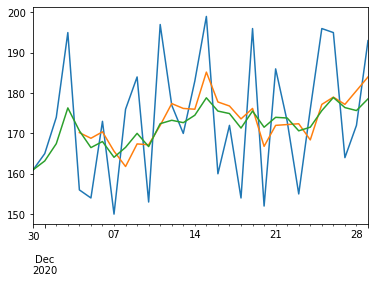

In [110]:
ts.plot()
ts.rolling(5).mean().plot()
ts.ewm(5).mean().plot()